## PROJETO : APLICAÇÃO DE REDES NEURAIS

#### Objetivo: O aluno deverá ser capaz de realizar uma análise completa dos dados e projetar uma rede neural para resolver o problema. Avaliar os resultados obtidos através das métricas de classificação
#### Problema: De posse de dados que correspondem a sinais de transitórios de eletrodomésticos (sinais obtidos em uma janela de 2s ao se ligar equipamento) e que foram rotulados em 7 diferentes classes, o aluno deverá realizar os seguintes passos:
#### 1) Carregar os dados e realizar a limpeza dos dados se necessário
#### 2) Visualizar os dados para a compreensão
#### 3) Como é um problema multiclasse, o aluno deverá transformar os labels para uma representação correta
#### 4) Preparar os dados para serem apresentados à ML
#### 5) Construir a rede neural com seus respectivos parâmetros. O aluno deve propor uma estratégia para determinar esses parâmetros
#### 6) Testar e validar os resultados
#### 7) Avaliar o uso do PCA (análise de Componentes Principais) para visualização dos dados e também como speed-up da ML (para fins de classificação)
#### 8) Conclusão
#### ---------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')



## Exercício 1) Obtendo os dados e limpeza de dados




In [2]:
df_projeto = pd.read_csv('https://raw.githubusercontent.com/CharlesPrado23/Notebooks/main/ANN/db.csv')
df_projeto

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,...,t161,t162,t163,t164,t165,t166,t167,t168,t169,t170,t171,t172,t173,t174,t175,t176,t177,t178,t179,t180,t181,t182,t183,t184,t185,t186,t187,t188,t189,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,24.00,25.00,23.00,23.00,23.00,24.00,24.00,24.00,23.00,22.00,20.00,22.00,20.00,19.00,15.00,12.00,5.00,2.00,0.00,0.00,0.00,1.00,-2.00,0.00,-2.00,1.00,0.00,1.00,-2.00,0.00,...,1.00,0.00,0.00,-1.00,0.00,0.00,1.00,-1.00,1.00,-1.00,0.00,0.00,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,-1.00,0.00,-2.00,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,21.00,22.00,23.00,22.00,22.00,21.00,21.00,21.00,23.00,22.00,23.00,20.00,21.00,22.00,23.00,22.00,22.00,20.00,22.00,21.00,23.00,21.00,22.00,20.00,21.00,21.00,22.00,22.00,21.00,19.00,...,0.00,2.00,0.00,2.00,-1.00,1.00,-1.00,1.00,0.00,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,-1.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,21.45,19.45,20.45,18.45,20.45,20.45,20.45,20.45,19.45,18.45,19.45,19.45,20.45,19.45,19.45,17.45,18.45,18.45,19.45,17.45,17.45,15.45,15.45,14.45,7.45,3.45,3.45,1.45,1.45,-0.55,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,16.30,15.30,17.30,16.30,16.30,15.30,15.30,15.30,16.30,15.30,16.30,14.30,14.30,14.30,15.30,14.30,13.30,12.30,11.30,10.30,5.30,3.30,2.30,0.30,0.30,-0.70,0.30,-0.70,0.30,-0.70,...,-0.70,0.30,-0.70,0.30,-0.70,0.30,0.30,0.30,-0.70,0.30,-0.70,1.30,-0.70,0.30,-0.70,0.30,-0.70,0.30,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,0.30,-0.70,0.30,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,1
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,1.85,-0.15,0.85,-1.15,-0.15,-0.15,0.85,-0.15,0.85,-1.15,-0.15,-0.15,0.85,-0.15,0.85,-1.15,-0.15,-0.15,0.85,-0.15,0.85,-1.15,-0.15,-0.15,0.85,-0.15,0.85,-1.15,-0.15,-0.15,...,-0.15,0.85,-0.15,-0.15,-1.15,0.85,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,-0.15,-1.15,0.85,-0.15,1.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,-0.15,-1.15,0.85,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.70,4.70,2.70,-0.30,0.70,0.70,2.70,1.70,1.70,0.70,0.70,-0.30,1.70,0.70,1.70,-0.30,0.70,-0.30,1.70,0.70,1.70,-0.30,-0.30,-0.30,1.70,0.70,1.70,-0.30,-0.30,-0.30,1.70,0.70,0.70,-0.30,-0.30,-0.30,1.70,-0.30,1.70,-0.30,...,-0.30,0.70,-0.30,0.70,-1.30,-0.30,-0.30,0.70,-0.30,0.70,-1.30,-1.30,-1.30,0.70,-0.30,0.70,-0.30,0.70,-0.30,0.70,-0.30,0.70,-0.30,0.70,-0.30,0.70,-0.30,0.70,-0.30,0.70,-0.30,-0.30,-0.30,0.70,-0.30,0.70,-1.30,-1.30,-0.30,5
96,11.55,5.55,2.55,1.55,0.55,1.55,0.55,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-1.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-1.45,0.55,-0.45,0.55,...,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-0.45,0.55,-1.45,0.55,-0.45,0.55,-0.45,0.55,6
97,14.35,4.35,1.35,2.35,-0.65,0.35,0.35,1.35,0.35,0.35,-0.65,1.35,0.35,-0.65,-1.65,-0.65,0.35,0.35,-0.65,-0.65,0.35,0.35,0.35,0.35,-0.65,-0.65,-0.65,0.35,-0.65,-0.

In [3]:
df_projeto.info

<bound method DataFrame.info of        t0     t1     t2     t3     t4  ...  t196  t197  t198  t199  Classes
0   24.00  24.00  23.00  25.00  24.00  ...  0.00  1.00  0.00  0.00        1
1   23.00  23.00  22.00  21.00  21.00  ...  0.00 -1.00  1.00  0.00        1
2   -0.55  -0.55  -0.55   3.45  13.45  ...  0.45 -0.55  0.45 -0.55        1
3   12.30  10.30  15.30  15.30  16.30  ...  1.30 -0.70  1.30 -0.70        1
4   24.85   2.85   5.85  -1.15   2.85  ...  0.85 -0.15  0.85 -0.15        2
..    ...    ...    ...    ...    ...  ...   ...   ...   ...   ...      ...
95  14.70   4.70   2.70  -0.30   0.70  ...  0.70 -1.30 -1.30 -0.30        5
96  11.55   5.55   2.55   1.55   0.55  ... -0.45  0.55 -0.45  0.55        6
97  14.35   4.35   1.35   2.35  -0.65  ...  0.35  0.35  0.35 -0.65        6
98  22.70  -5.30  -0.30  -5.30  -1.30  ...  0.70 -2.30  0.70 -1.30        7
99  -5.30  -6.30  -6.30  -6.30  -5.30  ...  1.70 -0.30 -0.30 -0.30        7

[100 rows x 201 columns]>

In [4]:
df_projeto.isnull().sum()

t0         0
t1         0
t2         0
t3         0
t4         0
          ..
t196       0
t197       0
t198       0
t199       0
Classes    0
Length: 201, dtype: int64

In [5]:
df_projeto.Classes.nunique()

7

In [6]:
df_projeto.groupby(['Classes']).mean()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,...,t160,t161,t162,t163,t164,t165,t166,t167,t168,t169,t170,t171,t172,t173,t174,t175,t176,t177,t178,t179,t180,t181,t182,t183,t184,t185,t186,t187,t188,t189,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199
Classes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,13.306250,12.681250,15.931250,16.806250,17.931250,17.181250,17.681250,19.306250,20.931250,20.306250,21.931250,20.806250,21.306250,21.05625,21.806250,21.431250,21.306250,20.681250,20.681250,20.806250,21.181250,20.806250,20.556250,19.931250,19.556250,18.931250,18.431250,17.681250,17.431250,16.431250,15.931250,15.306250,15.431250,14.681250,13.681250,12.306250,11.431250,10.806250,10.681250,10.056250,...,0.431250,-0.318750,0.431250,-0.193750,0.431250,-0.318750,0.306250,-0.318750,0.181250,-0.318750,0.181250,-0.693750,0.431250,-0.443750,0.181250,-0.068750,0.181250,-0.318750,0.181250,-0.318750,0.181250,-0.193750,0.306250,-0.318750,0.306250,-0.318750,0.306250,-0.318750,0.306250,-0.193750,0.056250,-0.443750,0.181250,-0.068750,0.306250,-0.318750,0.306250,-0.193750,0.431250,-0.318750
2,2.227273,1.045455,1.409091,0.318182,0.954545,0.409091,0.863636,0.409091,0.863636,0.136364,0.772727,0.409091,0.590909,0.50000,0.590909,0.227273,0.318182,0.136364,0.409091,0.045455,0.590909,0.136364,0.318182,-0.045455,0.227273,-0.045455,0.318182,-0.045455,0.409091,0.045455,0.227273,0.136364,0.409091,-0.045455,0.227273,0.045455,0.409091,0.318182,0.318182,-0.227273,...,0.045455,-0.409091,0.227273,-0.227273,0.500000,-0.318182,0.136364,-0.045455,0.045455,-0.227273,0.318182,-0.045455,0.136364,-0.227273,0.045455,-0.318182,0.318182,-0.318182,0.136364,-0.045455,0.045455,-0.045455,0.318182,-0.045455,0.136364,-0.318182,0.136364,-0.318182,0.318182,-0.227273,0.136364,0.136364,-0.045455,-0.136364,0.227273,-0.045455,0.136364,-0.318182,-0.045455,-0.045455
3,12.740000,12.006667,12.273333,11.073333,10.406667,9.606667,9.740000,8.873333,8.606667,8.073333,6.873333,6.540000,5.673333,6.14000,5.540000,5.940000,5.406667,4.673333,4.473333,4.540000,4.740000,4.606667,4.406667,4.073333,4.206667,3.340000,4.406667,3.873333,3.606667,3.606667,3.073333,3.606667,3.006667,3.073333,3.140000,2.606667,2.340000,2.606667,2.740000,2.940000,...,0.473333,-0.593333,-0.326667,-0.326667,0.073333,-0.126667,0.273333,0.140000,1.940000,1.206667,0.073333,0.006667,2.006667,0.006667,-0.260000,-0.060000,-0.060000,0.340000,0.206667,0.006667,0.073333,-0.193333,-0.260000,-0.060000,0.673333,-0.193333,-0.593333,-0.126667,0.073333,0.340000,0.006667,0.940000,-0.393333,-0.193333,0.073333,0.206667,0.673333,-0.260000,-0.593333,-0.193333
4,8.550000,2.800000,4.300000,2.550000,3.800000,3.050000,4.550000,3.300000,4.050000,3.050000,4.050000,2.800000,3.800000,2.55000,4.550000,2.300000,3.800000,2.800000,4.550000,2.800000,3.800000,2.800000,3.550000,2.550000,3.800000,2.800000,3.800000,2.300000,3.550000,2.800000,3.800000,2.800000,4.050000,2.550000,3.550000,3.300000,4.050000,3.300000,3.800000,2.800000,...,0.300000,-0.700000,0.800000,-0.450000,0.550000,-0.450000,0.300000,-0.450000,1.550000,-0.200000,0.300000,-0.450000,-0.200000,0.050000,0.300000,-0.450000,0.300000,-0.450000,0.050000,-0.700000,0.550000,0.050000,0.050000,-0.450000,0.300000,-0.200000,0.300000,-0.200000,0.050000,-0.450000,0.550000,-0.450000,0.550000,-0.200000,0.050000,-0.950000,0.550000,-0.450000,0.800000,-0.450000
5,19.518750,12.018750,8.268750,7.518750,6.268750,6.018750,5.768750,5.768750,4.893750,4.893750,3.893750,4.268750,4.143750,4.26875,4.018750,3.893750,3.143750,3.393750,3.143750,3.518750,3.143750,3.268750,2.143750,2.643750,2.268750,2.768750,2.018750,2.268750,1.143750,1.518750,1.268750,1.893750,1.518750,1.268750,0.268750,1.143750,0.768750,1.143750,0.768750,0.893750,...,-0.106250,-0.356250,0.018750,0.143750,0.393750,0.018750,0.018750,-0.106250,-0.356250,0.143750,0.268750,0.018750,0.018750,-0.606250,-0.106250,-0.231250,0.268750,0

In [7]:
df_projeto.values[0]

array([24., 24., 23., 25., 24., 25., 24., 24., 22., 25., 24., 25., 23.,
       23., 23., 24., 24., 24., 23., 22., 20., 22., 20., 19., 15., 12.,
        5.,  2.,  0.,  0.,  0.,  1., -2.,  0., -2.,  1.,  0.,  1., -2.,
        0., -1.,  1., -1.,  0., -2.,  0., -1.,  1.,  0.,  1., -1.,  0.,
       -1.,  1., -1.,  0., -1.,  1., -1.,  1.,  0.,  1., -1.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., -1.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., -1.,  0.,  0.,  1.,  0.,
        1., -1.,  1.,  0.,  1.,  0.,  1., -1.,  0.,  0.,  1.,  0.,  1.,
       -1.,  0., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -2.,
        1., -1.,  1., -1.,  1., -1.,  1.,  0.,  1.,  0.,  0., -1.,  1.,
        0.,  1.,  0.,  0., -1.,  1.,  0.,  1.,  0.,  0., -1.,  0.,  0.,
        1.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  1.,
        0.,  1., -1.,  0.,  0.,  1.,  0.,  0., -1.,  0.,  0.,  1., -1.,
        1., -1.,  0.,  0.,  1., -1.,  1., -1.,  1., -1.,  1., -1

## Exercício 2) Visualizando os dados

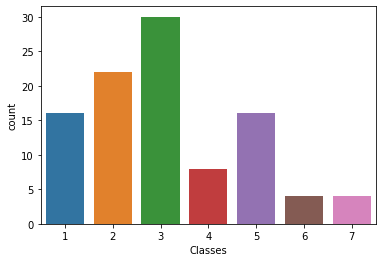

In [8]:
sns.countplot(df_projeto.Classes)

In [9]:
# Função para plotar gráfico 
# Parâmetros: DataFrame , número da classe e número da linha (default linha =1)
def plotClass(df,classe,linha=1):
    df1 = df[df['Classes'] == classe]
    df1.iloc[linha,:-1].T.plot(kind='line', figsize=(16, 8))
    plt.xlim([-2, 200])
    plt.title('Class %i' %classe)
    plt.xlabel('200 observations')
    plt.ylabel('Signal result');
    plt.show()

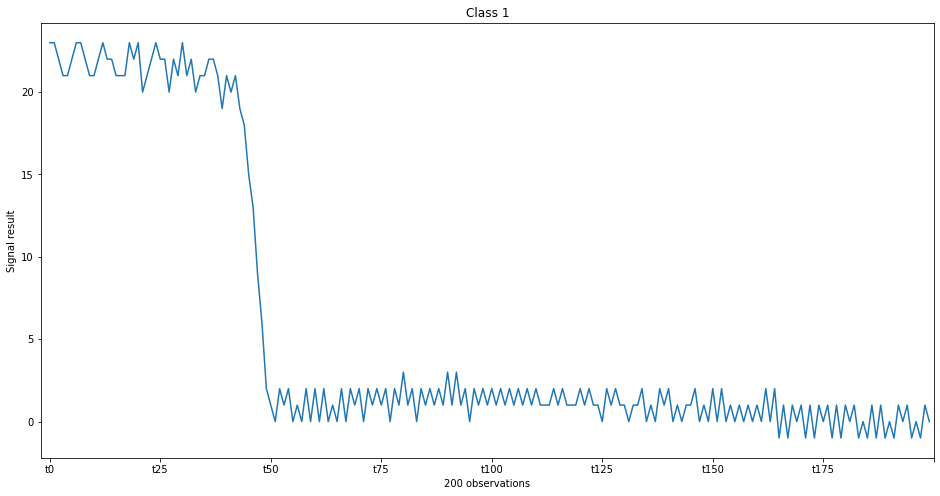

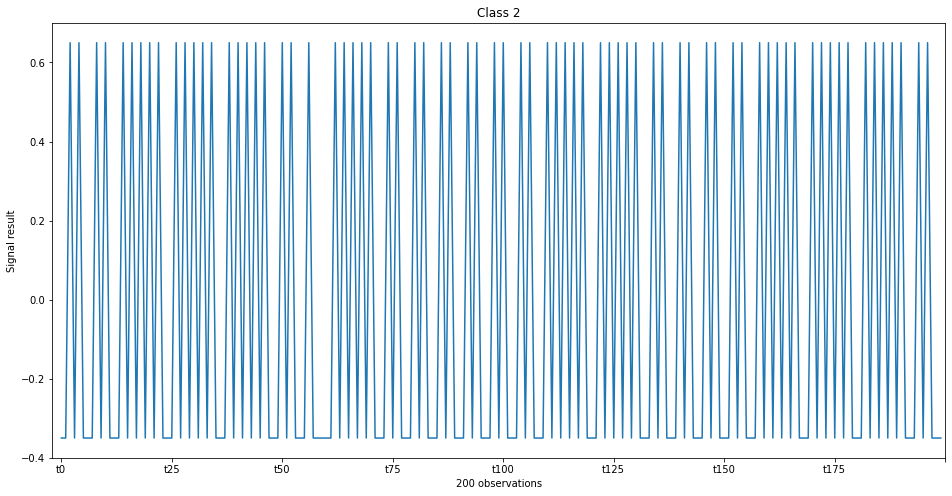

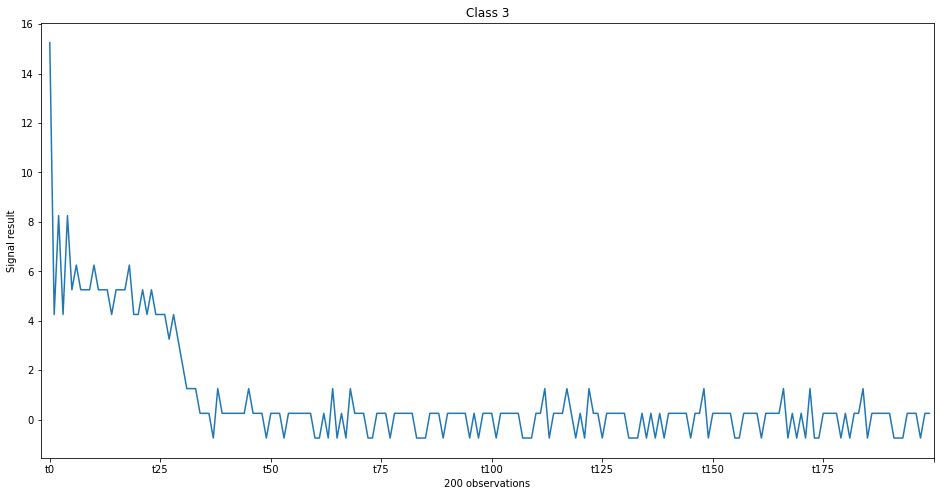

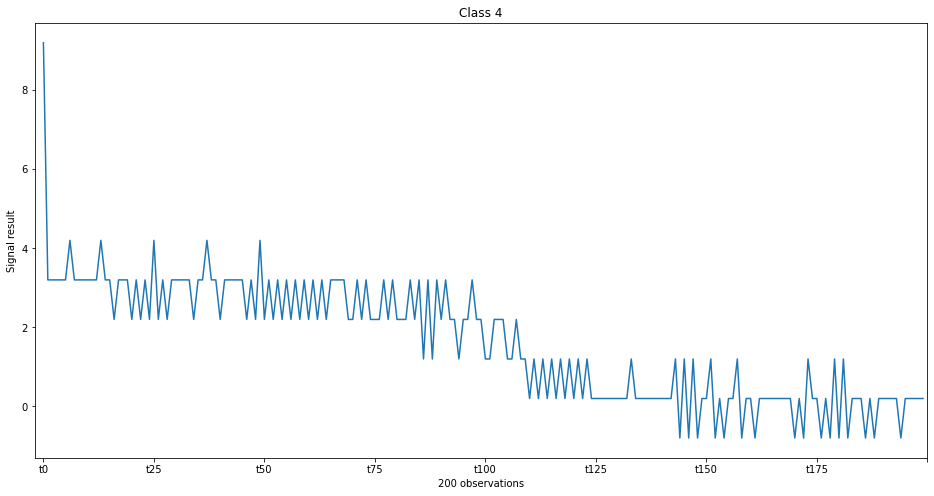

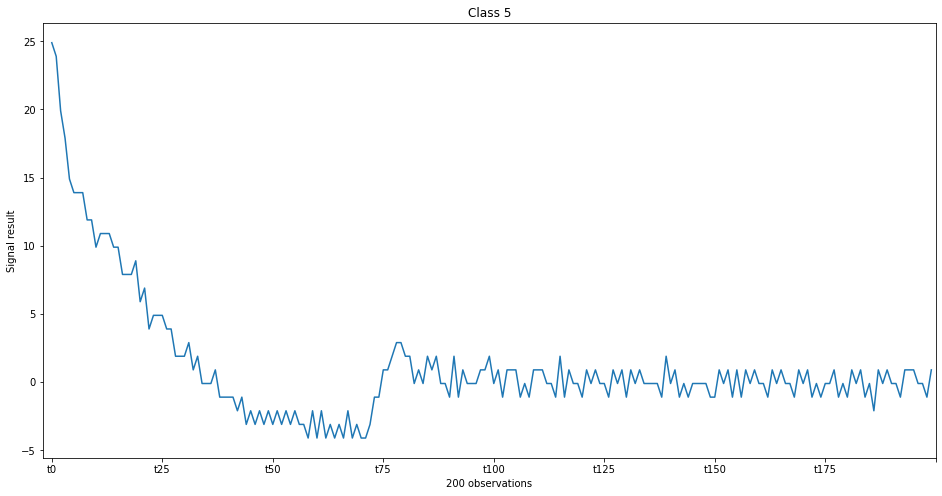

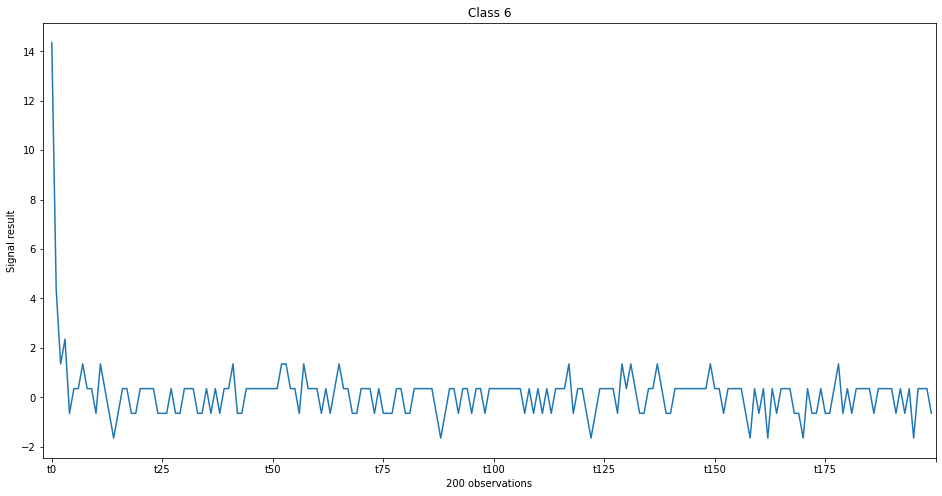

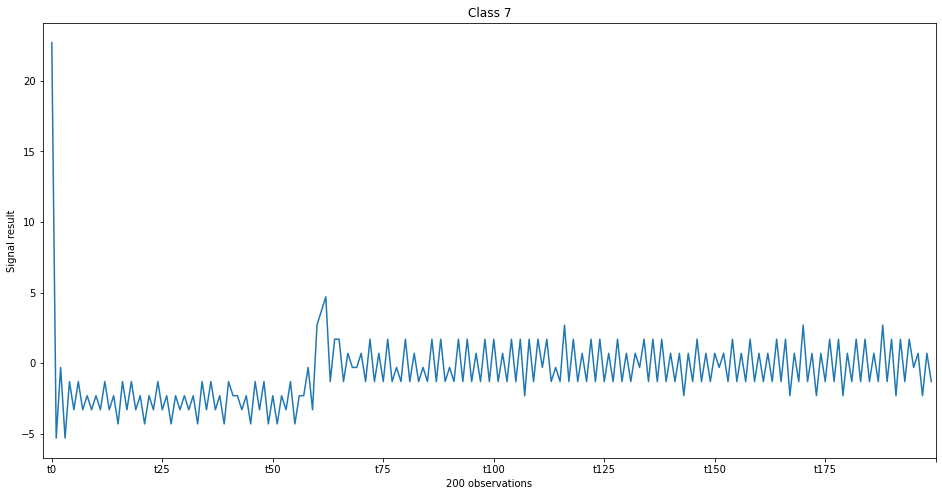

In [10]:
# Plotar os 7 gráficos das classes usando a função plotClass
for classe in range(1,8):
    plotClass(df_projeto,classe)

## Exercício 3) Transformando os labels para uma representação correta dos dados

In [11]:
dummy = pd.get_dummies(df_projeto['Classes'])
df_projeto = pd.concat([df_projeto, dummy], axis=1)
df_projeto.drop('Classes', axis = 1, inplace=True)

In [12]:
df_projeto.head(10)

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,...,t167,t168,t169,t170,t171,t172,t173,t174,t175,t176,t177,t178,t179,t180,t181,t182,t183,t184,t185,t186,t187,t188,t189,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199,1,2,3,4,5,6,7
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,24.00,25.00,23.00,23.00,23.00,24.00,24.00,24.00,23.00,22.00,20.00,22.00,20.00,19.00,15.00,12.00,5.00,2.00,0.00,0.00,0.00,1.00,-2.00,0.00,-2.00,1.00,0.00,1.00,-2.00,0.00,...,1.00,-1.00,1.00,-1.00,0.00,0.00,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,-1.00,0.00,-2.00,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1,0,0,0,0,0,0
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,21.00,22.00,23.00,22.00,22.00,21.00,21.00,21.00,23.00,22.00,23.00,20.00,21.00,22.00,23.00,22.00,22.00,20.00,22.00,21.00,23.00,21.00,22.00,20.00,21.00,21.00,22.00,22.00,21.00,19.00,...,-1.00,1.00,0.00,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,-1.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1,0,0,0,0,0,0
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,21.45,19.45,20.45,18.45,20.45,20.45,20.45,20.45,19.45,18.45,19.45,19.45,20.45,19.45,19.45,17.45,18.45,18.45,19.45,17.45,17.45,15.45,15.45,14.45,7.45,3.45,3.45,1.45,1.45,-0.55,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1,0,0,0,0,0,0
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,16.30,15.30,17.30,16.30,16.30,15.30,15.30,15.30,16.30,15.30,16.30,14.30,14.30,14.30,15.30,14.30,13.30,12.30,11.30,10.30,5.30,3.30,2.30,0.30,0.30,-0.70,0.30,-0.70,0.30,-0.70,...,0.30,0.30,-0.70,0.30,-0.70,1.30,-0.70,0.30,-0.70,0.30,-0.70,0.30,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,0.30,-0.70,0.30,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,1,0,0,0,0,0,0
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,1.85,-0.15,0.85,-1.15,-0.15,-0.15,0.85,-0.15,0.85,-1.15,-0.15,-0.15,0.85,-0.15,0.85,-1.15,-0.15,-0.15,0.85,-0.15,0.85,-1.15,-0.15,-0.15,0.85,-0.15,0.85,-1.15,-0.15,-0.15,...,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,-0.15,-1.15,0.85,-0.15,1.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,-0.15,-1.15,0.85,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,0,1,0,0,0,0,0
5,-0.35,-0.35,0.65,-0.35,0.65,-0.35,-0.35,-0.35,0.65,-0.35,0.65,-0.35,-0.35,-0.35,0.65,-0.35,0.65,-0.35,0.65,-0.35,0.65,-0.35,0.65,-0.35,-0.35,-0.35,0.65,-0.35,0.65,-0.35,0.65,-0.35,0.65,-0.35,0.65,-0.35,-0.35,-0.35,0.65,-0.35,...,-0.35,-0.35,-0.35,0.65,-0.35,0.65,-0.35,0.65,-0.35,0.65,-0.35,0.65,-0.35,-0.35,-0.35,0.65,-0.35,0.65,-0.35,0.65,-0.35,0.65,-0.35,0.65,-0.35,-0.35,-0.35,0.65,-0.35,0.65,-0.35,-0.35,-0.35,0,1,0,0,0,0,0
6,0.45,0.45,1.45,0.45,1.45,0.45,1.45,0.45,1.45,0.45,1.45,0.45,1.45,0.45,1.45,0.45,0.45,0.45,1.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1.45,0.45,1.45,-0.55,0.45,-0.55,0.45,0.45,1.45,0.45,-0.55,-0.55,...,0.45,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,-0.55,-0.55,0.45,0.45,0.45,0.45,-0.55,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,0.45,0.45,-0.55,-0.55,-0.55,0.45,0.45,0.45,-0.55,0,1,0,0,0,0,0
7,4.90,5.90,6.90,4.90,3.90,2.90,3.90,3.90,4.90,3.90,3.90,2.90,1.90,3.90,3.90,3.90,1.90,1.90,1.90,1.90,2.90,4.90,2.90,-0.10,0.90,-1.10,2.90,1.90,1.90,-0.10,0.90,0.90,1.90,0.90,1.90,-1.10,0.90,0.90,2.90,0.90,...,-0.10,-0.10,-1.10,-0.10,-0.10,-0.10,-1.10,-0.10,-1.10,0.90,-0.10,0.90,-1.10,-0.10,-0.10,1.90,-0.10,-0.10,-1.10,-1.10,-1.10,0.90,-0.10,1.90,2.90,-0.10,-0.10,-0.10,-0.10,-0.10,-1.10,-1.10,-1.10,0,1,0,0,0,0,0
8,0.10,0.10,-0.90,0.10,0.10,0.10,0.10,-0.90,-0.90,0.10,0.10,0.10,0.10,-0.90,0.10,-0.90,0.10,0.10,0.10,-0.90,0.10,-0.90,0.10,0.10,0.10,0.10,0.10,-0.90,1.10,0.10,0.10,-0.90,0.10,0.10,0.10,1.10,0.10,0.10,-0.90,-0.90,...,0.10,0.10,0.10,0.10,-0.90,0.

In [13]:
# Variáveis X e y
y = df_projeto[[1,2,3,4,5,6,7]]
X = df_projeto.drop([1,2,3,4,5,6,7], axis=1)

In [14]:
X.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,...,t160,t161,t162,t163,t164,t165,t166,t167,t168,t169,t170,t171,t172,t173,t174,t175,t176,t177,t178,t179,t180,t181,t182,t183,t184,t185,t186,t187,t188,t189,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,24.00,25.00,23.00,23.00,23.00,24.00,24.00,24.00,23.00,22.00,20.00,22.00,20.00,19.00,15.00,12.00,5.00,2.00,0.00,0.00,0.00,1.00,-2.00,0.00,-2.00,1.00,0.00,1.00,-2.00,0.00,...,0.00,1.00,0.00,0.00,-1.00,0.00,0.00,1.00,-1.00,1.00,-1.00,0.00,0.00,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,-1.00,0.00,-2.00,1.00,-1.00,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,21.00,22.00,23.00,22.00,22.00,21.00,21.00,21.00,23.00,22.00,23.00,20.00,21.00,22.00,23.00,22.00,22.00,20.00,22.00,21.00,23.00,21.00,22.00,20.00,21.00,21.00,22.00,22.00,21.00,19.00,...,1.00,0.00,2.00,0.00,2.00,-1.00,1.00,-1.00,1.00,0.00,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,-1.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,21.45,19.45,20.45,18.45,20.45,20.45,20.45,20.45,19.45,18.45,19.45,19.45,20.45,19.45,19.45,17.45,18.45,18.45,19.45,17.45,17.45,15.45,15.45,14.45,7.45,3.45,3.45,1.45,1.45,-0.55,...,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,16.30,15.30,17.30,16.30,16.30,15.30,15.30,15.30,16.30,15.30,16.30,14.30,14.30,14.30,15.30,14.30,13.30,12.30,11.30,10.30,5.30,3.30,2.30,0.30,0.30,-0.70,0.30,-0.70,0.30,-0.70,...,1.30,-0.70,0.30,-0.70,0.30,-0.70,0.30,0.30,0.30,-0.70,0.30,-0.70,1.30,-0.70,0.30,-0.70,0.30,-0.70,0.30,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,0.30,-0.70,0.30,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,1.85,-0.15,0.85,-1.15,-0.15,-0.15,0.85,-0.15,0.85,-1.15,-0.15,-0.15,0.85,-0.15,0.85,-1.15,-0.15,-0.15,0.85,-0.15,0.85,-1.15,-0.15,-0.15,0.85,-0.15,0.85,-1.15,-0.15,-0.15,...,0.85,-0.15,0.85,-0.15,-0.15,-1.15,0.85,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,-0.15,-1.15,0.85,-0.15,1.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,-0.15,-1.15,0.85,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15


In [15]:
X.shape

(100, 200)

In [16]:
y.head()

,1,2,3,4,5,6,7
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0


In [17]:
y.shape

(100, 7)

## Exercício 4) Preparando os dados para serem apresentados à ML

In [18]:
# Separando em train e test
# stratidy garante que todas as classes serão contempladas
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1, test_size=0.20)

#### Normalização

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Exercício 5) Construindo a rede neural com seus respectivos parâmetros

#### Parâmetros : 

  - hidden_layer_sizes - número de neurônios na camada intermediária ; número de camadas
  -  learnin_rate_init - taxa de aprendizado , fator que multiplica o gradiente (atualização dos pesos)  
  - random_state - Determina a geração de número aleatório para pesos e inicialização de polarização
  - max_iter - Número máximo de iterações. O solucionador itera até a convergência (determinada por 'tol') ou este número de iterações.
  - verbose - imprimir mensagens de progresso

In [21]:
clf = MLPClassifier(hidden_layer_sizes=200, random_state=1, max_iter=300, verbose=True,learning_rate_init=0.001,early_stopping=True, n_iter_no_change=30).fit(X_train, y_train)

Iteration 1, loss = 5.20882872
Validation score: 0.000000
Iteration 2, loss = 4.47272746
Validation score: 0.125000
Iteration 3, loss = 3.86481168
Validation score: 0.125000
Iteration 4, loss = 3.36691840
Validation score: 0.125000
Iteration 5, loss = 2.95836036
Validation score: 0.125000
Iteration 6, loss = 2.62276451
Validation score: 0.250000
Iteration 7, loss = 2.34383861
Validation score: 0.250000
Iteration 8, loss = 2.10915891
Validation score: 0.500000
Iteration 9, loss = 1.91012598
Validation score: 0.500000
Iteration 10, loss = 1.73985487
Validation score: 0.500000
Iteration 11, loss = 1.59398013
Validation score: 0.500000
Iteration 12, loss = 1.46858438
Validation score: 0.500000
Iteration 13, loss = 1.35979682
Validation score: 0.500000
Iteration 14, loss = 1.26435468
Validation score: 0.500000
Iteration 15, loss = 1.17999382
Validation score: 0.500000
Iteration 16, loss = 1.10446822
Validation score: 0.625000
Iteration 17, loss = 1.03639992
Validation score: 0.625000
Iterat

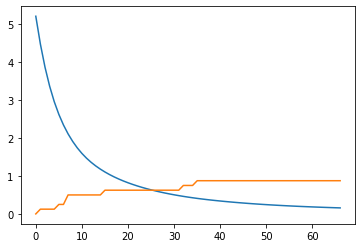

In [23]:
# Curva de custo
# Importante: para esta função funcionar é necessário No MLPClassifier o parâmetro early_stopping=True
# se vc quiser usar 10% do treino para validação basta colocar essa flag. Se quiser modificar o tamanho
# do conjunto de validacao deve acrescentar validation_fraction com percentual que vc desejar 
# por validation_fraction = 0.2  -> implica em usar 20% do conjunto de treino para validacao
plt.plot(clf.loss_curve_)
plt.plot(clf.validation_scores_)
plt.show()

In [24]:
y_predict = clf.predict(X_test)
y_predict

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

#### Métricas

In [25]:
# Score
print('Acurácia (test) :',clf.score(X_test,y_test))

Acurácia (test) : 0.8


In [26]:
# Score
print('Acurácia (Train) :',clf.score(X_train,y_train))

Acurácia (Train) : 0.95


In [27]:
X_test.shape

(20, 200)

In [28]:
y_test.shape

(20, 7)

In [29]:
y_test

,1,2,3,4,5,6,7
53,0,1,0,0,0,0,0
71,0,0,1,0,0,0,0
18,0,0,0,0,1,0,0
97,0,0,0,0,0,1,0
28,1,0,0,0,0,0,0
46,0,1,0,0,0,0,0
99,0,0,0,0,0,0,1
30,1,0,0,0,0,0,0
85,0,0,0,0,1,0,0
70,0,0,1,0,0,0,0


In [30]:
y_test.values.argmax(axis=1)

array([1, 2, 4, 5, 0, 1, 6, 0, 4, 2, 3, 2, 4, 2, 0, 2, 1, 1, 3, 2])

In [31]:
y_predict.argmax

<function ndarray.argmax>

In [32]:
y_predict

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [41]:
# Matriz de confusão
matrix_cf = multilabel_confusion_matrix(y_test, y_predict)
matrix_cf

array([[[17,  0],
        [ 0,  3]],

       [[16,  0],
        [ 0,  4]],

       [[14,  0],
        [ 2,  4]],

       [[18,  0],
        [ 1,  1]],

       [[17,  0],
        [ 1,  2]],

       [[19,  0],
        [ 0,  1]],

       [[19,  0],
        [ 0,  1]]])

In [33]:
# Matriz de confusão
matrix_cf = confusion_matrix(y_test.values.argmax(axis=1), y_predict.argmax(axis=1))
matrix_cf

array([[3, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0],
       [2, 0, 4, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1]])

In [34]:
labels = ['class0', 'class1','class2','class3','class4','class5','class6']

In [38]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

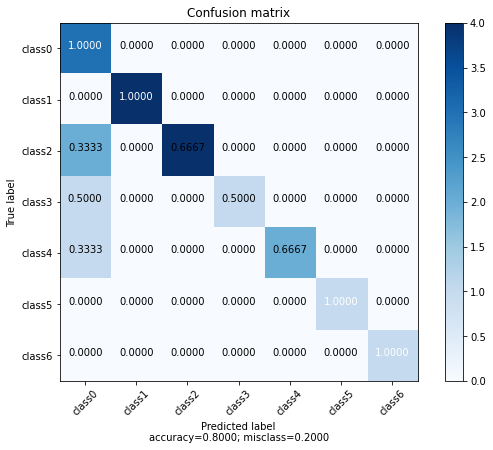

In [39]:
# percentuais
plot_confusion_matrix(matrix_cf,labels)

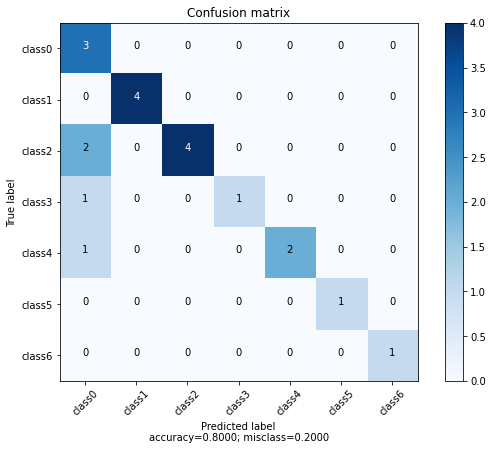

In [40]:
# Valores
plot_confusion_matrix(matrix_cf,labels, normalize=False)


## Estratégia para definição dos melhores parâmetros para a rede neural

In [42]:
# GridSearch
parameters = {'hidden_layer_sizes':range(50, 100, 200), 'learning_rate_init':np.arange(0.001,0.01,0.005)}
clfgrid = MLPClassifier(random_state=1, max_iter=300, validation_fraction= 0.1, verbose=True)
gridmodel = GridSearchCV(clfgrid, parameters)
model_grid = gridmodel.fit(X_train, y_train)
print(gridmodel.best_estimator_)
model = gridmodel.best_estimator_


Iteration 1, loss = 6.41637836
Iteration 2, loss = 6.02759745
Iteration 3, loss = 5.66404444
Iteration 4, loss = 5.33127923
Iteration 5, loss = 5.02818190
Iteration 6, loss = 4.74877463
Iteration 7, loss = 4.49123435
Iteration 8, loss = 4.25804900
Iteration 9, loss = 4.04774884
Iteration 10, loss = 3.85735321
Iteration 11, loss = 3.68588478
Iteration 12, loss = 3.52746368
Iteration 13, loss = 3.38240667
Iteration 14, loss = 3.24859847
Iteration 15, loss = 3.12450142
Iteration 16, loss = 3.00798922
Iteration 17, loss = 2.89821378
Iteration 18, loss = 2.79529553
Iteration 19, loss = 2.69734779
Iteration 20, loss = 2.60451821
Iteration 21, loss = 2.51735642
Iteration 22, loss = 2.43419081
Iteration 23, loss = 2.35444656
Iteration 24, loss = 2.27740205
Iteration 25, loss = 2.20335689
Iteration 26, loss = 2.13247851
Iteration 27, loss = 2.06477633
Iteration 28, loss = 1.99962828
Iteration 29, loss = 1.93692832
Iteration 30, loss = 1.87657617
Iteration 31, loss = 1.81854233
Iteration 32, los

In [43]:
print(gridmodel.best_estimator_)
model = gridmodel.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)


## Exercício 6) Testando e validando os resultados

In [44]:
print('Acurácia :',model.score(X_test,y_test))

Acurácia : 0.9


In [45]:
print('Acurácia :',model.score(X_train,y_train))

Acurácia : 1.0


In [46]:
# Matriz de confusão
matrix_cf = multilabel_confusion_matrix(y_test, y_predict)
matrix_cf

array([[[17,  0],
        [ 0,  3]],

       [[16,  0],
        [ 0,  4]],

       [[14,  0],
        [ 2,  4]],

       [[18,  0],
        [ 1,  1]],

       [[17,  0],
        [ 1,  2]],

       [[19,  0],
        [ 0,  1]],

       [[19,  0],
        [ 0,  1]]])

In [55]:
# Matriz de confusão
matrix_cf = confusion_matrix(y_test.values.argmax(axis=1), y_predict.argmax(axis=1))
matrix_cf

array([[3, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0],
       [2, 0, 4, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1]])

In [47]:
from sklearn import metrics
print('Acurácia :',model.score(X_test,y_test))
print(metrics.classification_report(y_test, y_predict, digits=2))

Acurácia : 0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      0.67      0.80         6
           3       1.00      0.50      0.67         2
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

   micro avg       1.00      0.80      0.89        20
   macro avg       1.00      0.83      0.90        20
weighted avg       1.00      0.80      0.88        20
 samples avg       0.80      0.80      0.80        20



## Exercício 7) Avaliando o uso do PCA

#### Visualização dos dados - Análise de componentes principais

In [48]:
pca = PCA().fit(X_train)

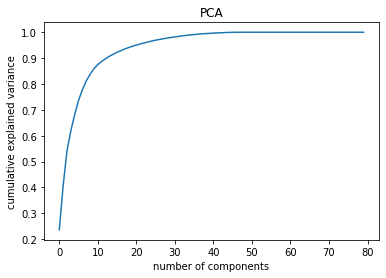

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### Redução de dimensionalidade - PCA - 95%

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [51]:
# Transform PCA em X_TRAIN
X_pca_Train = pca.transform(X_train)

In [52]:
clf = MLPClassifier(hidden_layer_sizes=(100), random_state=1, max_iter=300, verbose=True).fit(X_pca_Train, y_train)

Iteration 1, loss = 5.80468969
Iteration 2, loss = 5.56528916
Iteration 3, loss = 5.33467803
Iteration 4, loss = 5.11294142
Iteration 5, loss = 4.89993042
Iteration 6, loss = 4.69579074
Iteration 7, loss = 4.50006805
Iteration 8, loss = 4.31303160
Iteration 9, loss = 4.13459791
Iteration 10, loss = 3.96502030
Iteration 11, loss = 3.80364175
Iteration 12, loss = 3.65047753
Iteration 13, loss = 3.50501851
Iteration 14, loss = 3.36700595
Iteration 15, loss = 3.23612697
Iteration 16, loss = 3.11217777
Iteration 17, loss = 2.99479010
Iteration 18, loss = 2.88374559
Iteration 19, loss = 2.77859597
Iteration 20, loss = 2.67909498
Iteration 21, loss = 2.58493184
Iteration 22, loss = 2.49592274
Iteration 23, loss = 2.41189132
Iteration 24, loss = 2.33228909
Iteration 25, loss = 2.25708920
Iteration 26, loss = 2.18615741
Iteration 27, loss = 2.11896561
Iteration 28, loss = 2.05534705
Iteration 29, loss = 1.99503852
Iteration 30, loss = 1.93788394
Iteration 31, loss = 1.88365218
Iteration 32, los

In [53]:
# Transform PCA em X_TEST
X_pca_Test = pca.transform(X_test)


#### Métrica após redução de dimencionalidade - PCA

In [54]:
print('Score :',clf.score(X_pca_Test,y_test))
#clf.score(X_pca_Test,y_test)

Score : 0.9


#### Conclusão

O problema trata de eletrodomésticos que foram rotulados em 7 classes a partir de sinais de transitórios obtidos em uma janela de tempo de 2 s ao se ligar o aparelho.

O projeto através de uma rede neural classifica cada eletrodoméstico em uma das sete classes.
Analisando as métricas aplicadas ao conjunto de teste percebemos que em 90% dos casos a rede neural classificou corretamente.
Em relação a matriz de confusão, percebemos que o modelo classificou corretamente todos os eletrodomésticos nas classes 1, 2, 4 e 5. Observamos, também, que dois eletrodomésticos foram classificados de forma errada como sendo pertencentes a classe 6(falso positivo) e dois equipamentos não foram rotulados como sendo da classe 3 (falso negativo).
Além disso, foi aplicada uma estratégia para definição de parâmentros para a rede neural (gridsearch).

A redução de dimensionalidade de 95% aplicada aos dados foi bastante efetiva, pois após a mesma, o modelo continuou classificando corretamente em 90% dos casos.
